In [1]:
# basic (built-in) Python packages
import numpy as np
from numpy.linalg import norm
import pandas as pd
import matplotlib.pyplot as plt

# advanced (built-in) Python packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from scipy.optimize import minimize

# my implemented Python functions and classes
from data.generate_data import generate_data
from model.BaseModel import BaseModel
from model.MLE import MLE
from model.OS import OS
from model.ORACLE import ORACLE
from model.Initial import Initial

/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Hyperparameters

In [2]:
K_list = [1, 9]
r_list = [0.05, 0.1, 0.15]
alpha_list = [0.1, 0.2, 0.5, 1]

K = K_list[0]           # (K+1) classes
alpha = 1 # n**(-0.1)  
r = r_list[0]

In [3]:
seed = 0
np.random.seed(seed=seed)

N = 10000                    # the size of the unlabeled dataset
n = int(N * r)               # pilot sample size
p = 10                       # feature dimension
M = int(n / np.log(n))       # the size of the annotator pool

alpha=1.0000
[n*alpha=500/N=10000]
[M=80] vs [n*alpha=500]


In [4]:
print(f"alpha={alpha:.4f}")  # 
print(f"[n*alpha={int(n*alpha)}/N={N}]")
print(f"[M={M}] vs [n*alpha={int(n*alpha)}]")

alpha=1.0000
[n*alpha=500/N=10000]
[M=80] vs [n*alpha=500]


# Data Generation

In [5]:
beta, sigma_list, theta, X, Y, X1, X2, Y1, Y2, A1, AY1 = generate_data(K, p, N, n, M, alpha, seed=0)

True Labels 0    5026
1    4974
dtype: int64 



In [6]:
sigma_list

array([1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1])

# Initial Estimator

In [7]:
init_model = Initial(X1, AY1, A1, K)
init_beta, init_sigma, init_betams = init_model.init_param()
print(norm(init_beta - beta[1:]), norm(init_sigma - sigma_list))

0.014235419739867838 0.8487157004496126


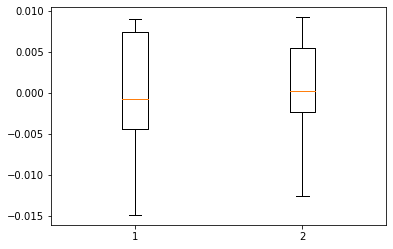

In [24]:
diff_mom, diff_son = init_model.check(init_beta, init_sigma, beta[1:], sigma_list)
plt.boxplot([diff_mom, diff_son.ravel()])
plt.show()

# Oracle

In [25]:
oracle_model = ORACLE(X1, AY1, A1, K, init_beta, sigma_list)
oracle_beta = oracle_model.update_alg(max_steps=5, tol=1e-5, true_beta=beta[1:])
print(norm(oracle_beta - beta[1:].ravel()))

######## [Step 1] ########
norm(gradient): 0.9465917
RMSE(beta): 0.0270921
######## [Step 2] ########
norm(gradient): 0.0348570
RMSE(beta): 0.0266780
######## [Step 3] ########
norm(gradient): 0.0000524
RMSE(beta): 0.0266776
0.018952818037590285


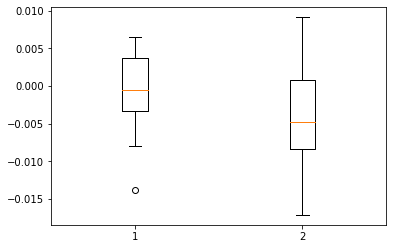

In [26]:
diff_mom, diff_son = oracle_model.check(beta[1:], sigma_list)
plt.boxplot([diff_mom, diff_son.ravel()])
plt.show()

In [9]:
print(norm(oracle_beta - beta[1:].ravel()))

0.01368812257644268


# One Step Update

In [10]:
os_model = OS(X1, AY1, A1, K, init_beta, init_sigma)
os_beta, os_sigma = os_model.update_alg(max_steps=1, tol=1e-5, true_beta=beta[1:].ravel())

######## [Step 1] ########
norm(gradient): 3.4686948
RMSE(beta): 0.0165224


In [11]:
ts_model = OS(X1, AY1, A1, K, init_beta, init_sigma)
ts_beta, ts_sigma = ts_model.update_alg(max_steps=2, tol=1e-5, true_beta=beta[1:].ravel())

######## [Step 1] ########
norm(gradient): 3.4686948
RMSE(beta): 0.0165224
######## [Step 2] ########
norm(gradient): 0.5304560
RMSE(beta): 0.0138282


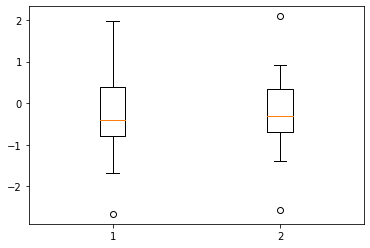

In [12]:
diff_mom, diff_son, var = os_model.check(init_beta, init_sigma, beta[1:], sigma_list)
plt.boxplot([diff_mom.ravel(), diff_son.ravel()])
plt.show()

# MLE

In [13]:
mle_model = OS(X1, AY1, A1, K, init_beta, init_sigma)
# mle_beta, mle_sigma = mle_model.NR_alg(max_updates=3, max_steps=5, tol=1e-5, sig=0.1, lbd=0.1, rho=2, 
#                                         true_beta=beta[1:].ravel())
mle_beta, mle_sigma = mle_model.update_alg(max_steps=20, tol=1e-5, true_beta=beta[1:].ravel())

######## [Step 1] ########
norm(gradient): 3.4686948
RMSE(beta): 0.0165224
######## [Step 2] ########
norm(gradient): 0.5304560
RMSE(beta): 0.0138282
######## [Step 3] ########
norm(gradient): 0.0672163
RMSE(beta): 0.0132153
######## [Step 4] ########
norm(gradient): 0.0196001
RMSE(beta): 0.0130440
######## [Step 5] ########
norm(gradient): 0.0053012
RMSE(beta): 0.0130207
######## [Step 6] ########
norm(gradient): 0.0008395
RMSE(beta): 0.0130141
######## [Step 7] ########
norm(gradient): 0.0002267
RMSE(beta): 0.0130132
######## [Step 8] ########
norm(gradient): 0.0000331
RMSE(beta): 0.0130130
######## [Step 9] ########
norm(gradient): 0.0000090
RMSE(beta): 0.0130130


In [14]:
print(norm(mle_beta - beta[1:].ravel()), norm(mle_sigma - sigma_list))

0.013012951967010276 2.324204884540343


# Compare

In [15]:
def compute_rmse(est, true):
    est = est.ravel()
    true = true.ravel()
    return norm(est - true)

In [16]:
B = 100
RMSE_results = []
NAME_results = []

In [17]:
for seed in range(B):
    RMSE_list = [seed, n, alpha, M]
    NAME_list = ["seed", "n", "alpha", "M"]
    np.random.seed(seed)
    beta, sigma_list, theta, X, Y, X1, X2, Y1, Y2, A1, AY1 = generate_data(K, p, N, n, M, alpha, seed=seed)

    # Initial Estimator
    print(f"\n########## Initial Estimator ##########")
    init_model = Initial(X1, AY1, A1, K)
    init_beta, init_sigma, init_betams = init_model.init_param()
    init_beta_rmse = compute_rmse(init_beta, beta[1:])
    init_sigma_rmse = compute_rmse(init_sigma, sigma_list)
    print(init_beta_rmse, init_sigma_rmse)
    RMSE_list += [init_beta_rmse, init_sigma_rmse]
    NAME_list += ["init_beta", "init_sigma"]
    
    # OS (One-Step) Estimator 
    print(f"\n########## OS Estimator ##########")
    os_model = OS(X1, AY1, A1, K, init_beta, init_sigma)
    os_beta, os_sigma = os_model.update_alg(max_steps=1, tol=1e-5, true_beta=beta[1:].ravel())
    os_beta_rmse = compute_rmse(os_beta, beta[1:])
    os_sigma_rmse = compute_rmse(os_sigma, sigma_list)
    print(os_beta_rmse, os_sigma_rmse)
    RMSE_list += [os_beta_rmse, os_sigma_rmse]
    NAME_list += ["os_beta", "os_sigma"]

    # TS
    print(f"\n########## MLE(NR) Estimator ##########")
    ts_model = OS(X1, AY1, A1, K, init_beta, init_sigma)
    ts_beta, ts_sigma = ts_model.update_alg(max_steps=2, tol=1e-5, true_beta=beta[1:].ravel())
    ts_beta_rmse = compute_rmse(ts_beta, beta[1:])
    ts_sigma_rmse = compute_rmse(ts_sigma, sigma_list)
    print(ts_beta_rmse, ts_sigma_rmse)
    RMSE_list += [ts_beta_rmse, ts_sigma_rmse]
    NAME_list += ["ts_beta", "ts_sigma"]
    
    # Oracle
    print(f"\n########## ORACLE Estimator ##########")
    oracle_model = ORACLE(X1, AY1, A1, K, init_beta, sigma_list)
    oracle_beta = oracle_model.update_alg(max_steps=5, tol=1e-5, true_beta=beta[1:])
    oracle_beta_rmse = compute_rmse(oracle_beta, beta[1:])
    print(oracle_beta_rmse)
    RMSE_list.append(oracle_beta_rmse)
    NAME_list.append("oracle_beta")

    # Record Results
    RMSE_results.append(RMSE_list)
    a = pd.DataFrame(RMSE_results, columns=NAME_list)
    a.to_csv(f"/Users/helenology/Desktop/[M={M}]rmse_data.csv")

True Labels 1    39315
0    33292
2    27393
dtype: int64 


########## Initial Estimator ##########
0.02842756271945705 2.873892038007281

########## OS Estimator ##########
######## [Step 1] ########
norm(gradient): 3.4686948
RMSE(beta): 0.0165224
0.016522416631891697 2.0735030674121107

########## MLE(NR) Estimator ##########
######## [Step 1] ########
norm(gradient): 3.4686948
RMSE(beta): 0.0165224
######## [Step 2] ########
norm(gradient): 0.5304560
RMSE(beta): 0.0138282
0.013828198656658254 2.2222842891725265

########## ORACLE Estimator ##########
######## [Step 1] ########
norm(gradient): 2.9649333
RMSE(beta): 0.0150485
######## [Step 2] ########
norm(gradient): 0.0705905
RMSE(beta): 0.0148592
######## [Step 3] ########
norm(gradient): 0.0000557
RMSE(beta): 0.0148589
0.01368812257644268
True Labels 1    51747
2    24464
0    23789
dtype: int64 


########## Initial Estimator ##########
0.03759602888329976 3.162614879077691

########## OS Estimator ##########
######## [Step 1] #